# Exploritory Data Analysis

## Data cleaning

In [1]:
import json
import pandas as pd
import re
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
# import 2018 goodreads books
with open("Goodreads_books_2018.json") as datafile:
    data_2018 = json.load(datafile)

In [3]:
# import 2017 goodreads books
with open("Goodreads_books_2017.json") as datafile:
    data_2017 = json.load(datafile)

### Cleaing up Goodreads book data

In [4]:
df_2018 = pd.DataFrame(data_2018)

In [5]:
df_2017 = pd.DataFrame(data_2017)

In [6]:
# join the dataframes
df_goodreads = pd.concat([df_2017,df_2018])

In [7]:
# reset the index
df_goodreads.reset_index(drop=True,inplace=True)

In [8]:
df_goodreads.shape

(2803, 10)

In [9]:
# change the order of the columns
df_goodreads = df_goodreads[['ISBN','title','series','author','rating','genre','publish_date','publish_company','format','number_of_pages']]

In [10]:
# get rid of rows where ISBN data isn't in the 13-digit format using regex
reg_ex = r'^(\d{13})$'

df_goodreads = df_goodreads[df_goodreads['ISBN'].str.contains(reg_ex)]

/Users/Kristinabarounis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  after removing the cwd from sys.path.


In [11]:
# make series column binary (0 if not part of a series, 1 if it is)
df_goodreads['series'].loc[(df_goodreads['series'] == "Edit Details")] = 0
df_goodreads['series'].loc[(df_goodreads['series'] != 0)] = 1

In [12]:
# convert rating column to numbers
df_goodreads['rating'] = df_goodreads['rating'].astype(float)

In [13]:
# split up the date into month and year
df_goodreads['publish_month'] = df_goodreads['publish_date'].str.split(n=2,expand = True)[0]
df_goodreads['publish_year'] = df_goodreads['publish_date'].str.split(n=2,expand = True)[2]

In [14]:
# 1172 books from goodreads between 2017 and 2018 bc we dropped the empty ISBNs
df_goodreads.shape

(1172, 12)

In [15]:
# reset the index again
df_goodreads.reset_index(drop=True, inplace=True)

In [16]:
# need to drop duplicate ISBNs - there is only 1
df_goodreads[df_goodreads.duplicated(subset='ISBN') == True]

,ISBN,title,series,author,rating,genre,publish_date,publish_company,format,number_of_pages,publish_month,publish_year
927,9780062676788,The Word Is Murder,1,Anthony Horowitz,3.92,mystery,June 5th 2018,Harper (first published August 24th 2017),Hardcover,390,June,2018


In [17]:
df_goodreads[df_goodreads['ISBN'] == '9780062676788']

,ISBN,title,series,author,rating,genre,publish_date,publish_company,format,number_of_pages,publish_month,publish_year
545,9780062676788,The Word Is Murder,1,Anthony Horowitz,3.92,mystery,June 5th 2018,Harper (first published August 24th 2017),Hardcover,390,June,2018
927,9780062676788,The Word Is Murder,1,Anthony Horowitz,3.92,mystery,June 5th 2018,Harper (first published August 24th 2017),Hardcover,390,June,2018


In [18]:
# let's drop the second one
df_goodreads = df_goodreads.drop(index = 545)

In [19]:
# now there's only one!
df_goodreads[df_goodreads['ISBN'] == '9780062676788']

,ISBN,title,series,author,rating,genre,publish_date,publish_company,format,number_of_pages,publish_month,publish_year
927,9780062676788,The Word Is Murder,1,Anthony Horowitz,3.92,mystery,June 5th 2018,Harper (first published August 24th 2017),Hardcover,390,June,2018


### Cleaning up NYT bestseller data

In [20]:
# import the NYT bestsellers
with open("list_of_NYT_books.json") as datafile:
    NYT_bestsellers = json.load(datafile)

In [21]:
df_NYT = pd.DataFrame(NYT_bestsellers)

In [22]:
# do everything to this dataframe that we did to the df above before merging

In [23]:
df_NYT = df_NYT[['ISBN','title','series','author','rating','genre','publish_date','publish_company','format','number_of_pages']]

In [24]:
# make series a binary value
df_NYT['series'].loc[(df_NYT['series'] == "Edit Details")] = 0
df_NYT['series'].loc[(df_NYT['series'] != 0)] = 1

In [25]:
# split up the date into month and year
df_NYT['publish_month'] = df_NYT['publish_date'].str.split(n=2,expand = True)[0]
df_NYT['publish_year'] = df_NYT['publish_date'].str.split(n=2,expand = True)[2]

In [26]:
# convert rating to a float
df_NYT['rating'] = df_NYT['rating'].astype(float)

In [27]:
# create a column of 1's to represent that these are all bestsellers 
df_NYT['NYT_bestseller'] = 1

In [28]:
# drop duplicate books
df_NYT = df_NYT.drop_duplicates()

In [29]:
len(df_NYT)

558

### Merge the dataframes and continue cleaning

In [30]:
full_df = pd.concat([df_NYT,df_goodreads], sort=False)

In [31]:
full_df.shape

(1729, 13)

In [32]:
# let's reset the index
full_df.reset_index(drop=True, inplace=True)

In [33]:
full_df.index

RangeIndex(start=0, stop=1729, step=1)

In [34]:
# fill in the non-bestsellers with 0 in that column
full_df['NYT_bestseller'].fillna(value=0,inplace=True)

#### Clean up date information

In [35]:
# look at dates that weren't coded properly
full_df[(full_df['publish_month'] != 'January') &
        (full_df['publish_month'] != 'February') &
        (full_df['publish_month'] != 'March') &
        (full_df['publish_month'] != 'April') &
        (full_df['publish_month'] != 'May') &
        (full_df['publish_month'] != 'June') &
        (full_df['publish_month'] != 'July') &
        (full_df['publish_month'] != 'August') &
        (full_df['publish_month'] != 'September') &
        (full_df['publish_month'] != 'October') &
        (full_df['publish_month'] != 'November') &
        (full_df['publish_month'] != 'December')]


,ISBN,title,series,author,rating,genre,publish_date,publish_company,format,number_of_pages,publish_month,publish_year,NYT_bestseller
438,9780399592805,The Golden House,0,Salman Rushdie,3.66,fiction,2017,Random House,Hardcover,380,2017,None,1.0
1035,9781927990216,Prime Meridian,0,Silvia Moreno-Garcia,4.03,science-fiction,,Innsmouth Free Press (first published December...,Paperback,122,None,None,0.0
1381,9789381841372,Wedding Pickle,0,Neha Sharma,4.03,asian-literature,2018,Grapevine India,Paperback,264,2018,None,0.0
1597,9780300219333,Packing My Library: An Elegy and Ten Digressi...,0,Alberto Manguel,3.88,writing,2018,Yale University Press,Hardcover,146,2018,None,0.0
1692,9780062468741,The Iron Season,1,Helene Wecker,4.03,fantasy,Expected publication: 2020,Harper,ebook,448,Expected,2020,0.0


In [36]:
# manually fix these, except the last one which hasn't been published yet - let's drop that one
full_df['publish_month'].loc[full_df['ISBN'] == '9780399592805'] = 'September'
full_df['publish_month'].loc[full_df['ISBN'] == '9781927990216'] = 'July'
full_df['publish_month'].loc[full_df['ISBN'] == '9789381841372'] = 'January'
full_df['publish_month'].loc[full_df['ISBN'] == '9780300219333'] = 'March'
full_df = full_df.drop(index=1692)

/Users/Kristinabarounis/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [37]:
# lets also fix the years
full_df['publish_year'].loc[full_df['ISBN'] == '9780399592805'] = '2017'
full_df['publish_year'].loc[full_df['ISBN'] == '9781927990216'] = '2018'
full_df['publish_year'].loc[full_df['ISBN'] == '9789381841372'] = '2018'
full_df['publish_year'].loc[full_df['ISBN'] == '9780300219333'] = '2018'

In [38]:
# lets do the same thing to check that the year was coded correctly but use regex since 
# so we don't have to manually write out all the years
reg_ex_year = r'^(\s*2[0-9]{3}\s*)$' 

full_df[full_df['publish_year'].str.contains(reg_ex_year) == False]

/Users/Kristinabarounis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """


,ISBN,title,series,author,rating,genre,publish_date,publish_company,format,number_of_pages,publish_month,publish_year,NYT_bestseller
398,9780061122415,The Alchemist,0,Paulo Coelho,3.85,fiction,May 1st 1993,HarperCollins (first published 1988),Paperback,197,May,1993,1.0
880,9781520356686,Fire in His Blood,1,Ruby Dixon,3.82,fantasy,January 11th 2017(first published January 9th ...,,Paperback,331,January,2017(first published January 9th 2017),0.0
1126,9781946836038,Amnesia,1,Cambria Hebert,3.99,romance,June 13th 2017(first published June 10th 2017),,Paperback,408,June,2017(first published June 10th 2017),0.0


In [39]:
# manually change the last two (the first one is correct just written a long time ago!)
full_df['publish_year'].loc[full_df['ISBN'] == '9781520356686'] = '2017'
full_df['publish_year'].loc[full_df['ISBN'] == '9781946836038'] = '2017'

In [40]:
# all fixed!

full_df[full_df['publish_year'].str.contains(reg_ex_year) == False]

/Users/Kristinabarounis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,ISBN,title,series,author,rating,genre,publish_date,publish_company,format,number_of_pages,publish_month,publish_year,NYT_bestseller
398,9780061122415,The Alchemist,0,Paulo Coelho,3.85,fiction,May 1st 1993,HarperCollins (first published 1988),Paperback,197,May,1993,1.0


##### Get rid of duplicates

In [41]:
# there are cases where some books are duplicated (58)- the one's shown below are from goodreads
# and are encoded as not best sellers (0 in the NYT column), even though they really are since they also appear
# in the NYT dataframe and came from the NYT API
len(full_df[full_df.duplicated(subset='ISBN') == True])

58

In [42]:
# make the duplicates a 1 in the NYT best seller column so they are TRULY the same exact rows
# that way we can use duplicated to drop them and the result will be one copy
full_df['NYT_bestseller'].loc[full_df.duplicated(subset='ISBN')==True] = 1

In [43]:
full_df=full_df.drop_duplicates()

In [44]:
full_df.shape

(1671, 13)

In [45]:
full_df.reset_index(drop=True, inplace=True)

In [46]:
full_df.index

RangeIndex(start=0, stop=1671, step=1)

#### Deal with missing values

In [47]:
# because of how we scraped, there are null values in the df currently coded as strings
import numpy as np
np.where(full_df.applymap(lambda x: x == ''))

(array([  60,  120,  133,  133,  292,  340,  440,  530,  546,  557,  585,
         632,  845,  860,  906,  909,  915,  932,  967,  969,  996, 1010,
        1010, 1010, 1024, 1040, 1063, 1076, 1077, 1083, 1095, 1303, 1366,
        1366, 1489, 1503, 1545, 1586, 1612, 1627]),
 array([9, 9, 5, 9, 9, 9, 8, 9, 9, 9, 7, 7, 7, 9, 9, 5, 5, 5, 7, 9, 6, 5,
        7, 9, 7, 9, 7, 7, 9, 9, 7, 7, 7, 9, 5, 9, 9, 9, 9, 5]))

In [48]:
# let's replace them with nan values 
full_df.replace(r'^\s*$', np.nan, regex=True, inplace = True)

In [49]:
# now they aren't coded as strings
np.where(full_df.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

In [50]:
# let's see the empty values now
full_df.isna().sum()

ISBN                0
title               0
series              0
author              0
rating              0
genre               7
publish_date        1
publish_company    11
format              1
number_of_pages    20
publish_month       0
publish_year        5
NYT_bestseller      0
dtype: int64

In [51]:
# deal with empty values
# just drop the ones with no page numbers
full_df[full_df['number_of_pages'].isna()] 
full_df.dropna(subset=['number_of_pages'], inplace=True)

In [52]:
full_df[full_df['publish_date'].isna()]
# this is fine we manually fixed the month and year columns already

,ISBN,title,series,author,rating,genre,publish_date,publish_company,format,number_of_pages,publish_month,publish_year,NYT_bestseller
996,9781927990216,Prime Meridian,0,Silvia Moreno-Garcia,4.03,science-fiction,NaN,Innsmouth Free Press (first published December...,Paperback,122,July,2018,0.0


In [53]:
full_df[full_df['publish_year'].isna()]

,ISBN,title,series,author,rating,genre,publish_date,publish_company,format,number_of_pages,publish_month,publish_year,NYT_bestseller
26,9780061792663,American Gods,1,Neil Gaiman,4.11,fantasy,June 2001,HarperCollins e-books,ebook,541,June,None,1.0
436,9781594633669,The Girl on the Train,0,Paula Hawkins,3.91,fiction,April 2019,Riverhead Books (first published January 13th ...,Hardcover,336,April,None,1.0
690,9781760293512,Frogkisser!,0,Garth Nix,3.77,fantasy,March 2017,Allen & Unwin (first published February 28th 2...,Paperback,336,March,None,0.0
1002,9781612196015,Why I Am Not a Feminist: A Feminist Manifesto,0,Jessa Crispin,3.54,feminism,February 2017,Melville House,Paperback,151,February,None,0.0
1102,9781335014900,As I Am,1,A.M. Arthur,4.03,romance,March 2017,Carina Press (first published February 13th 2017),Paperback,368,March,None,0.0


In [54]:
# manually fix these

full_df['publish_year'].loc[full_df['ISBN'] == '9780061792663'] = '2001'
full_df['publish_year'].loc[full_df['ISBN'] == '9781594633669'] = '2019'
full_df['publish_year'].loc[full_df['ISBN'] == '9781760293512'] = '2017'
full_df['publish_year'].loc[full_df['ISBN'] == '9781612196015'] = '2017'
full_df['publish_year'].loc[full_df['ISBN'] == '9781335014900'] = '2017'

In [55]:
# let's drop these since genre is missing and the genre reflected in the rest of the datafarme
# was taken from goodreads and based on peoples votes - genre is subjective (for our data at lest) so we don't
# want to input genre in a different way and mess with the data
full_df[full_df['genre'].isna()]

,ISBN,title,series,author,rating,genre,publish_date,publish_company,format,number_of_pages,publish_month,publish_year,NYT_bestseller
909,9781912551118,Walk Quiet Run Quick,0,Jacqueline Francis,2.50,NaN,March 3rd 2018,Conscious Dreams Publishing (first published 2...,Paperback,164,March,2018,0.0
915,9781522072942,The Hackers Code: The Great Prison Escape Pro...,0,A.K. Mars,4.67,NaN,August 13th 2017,A. K. MARS,Paperback,288,August,2017,0.0
932,9781978493162,"New Trump Order: Get In, Fit in or Step Aside",0,America Speaks,5.00,NaN,October 19th 2017,Createspace,Paperback,266,October,2017,0.0
1489,9782021377613,Les vacances du petit Renard,0,Arthur Cahn,3.29,NaN,January 4th 2018,Le Seuil,Kindle Edition,192,January,2018,0.0
1627,9781725040304,Knitting in the City Coloring Book,1,Penny Reid,4.82,NaN,September 17th 2018,CreateSpace (first published September 11th 2018),Paperback,66,September,2018,0.0


In [56]:
full_df.dropna(subset=['genre'], inplace=True)

In [57]:
# they're gone!
full_df[full_df['genre'].isna()]

,ISBN,title,series,author,rating,genre,publish_date,publish_company,format,number_of_pages,publish_month,publish_year,NYT_bestseller


#### Clean up genre data

In [58]:
# these look fine - just going to add sports to "sports and games" so they aren't separate buckets
full_df['genre'].value_counts()

non-fiction            232
fiction                231
fantasy                203
mystery                191
romance                161
young-adult            103
historical              97
sequential-art          57
science-fiction         41
history                 40
thriller                35
childrens               32
politics                23
short-stories           19
poetry                  16
horror                  15
biography               15
contemporary            14
media-tie-in            12
food-and-drink          11
sports-and-games        10
autobiography           10
christian-fiction        7
science                  7
health                   6
colouring-books          5
womens-fiction           5
business                 4
religion                 3
crime                    3
lgbt                     3
leadership               2
music                    2
feminism                 2
humor                    2
erotica                  2
language                 2
e

In [59]:
full_df['genre'].loc[full_df['genre'] =='sports'] = 'sports-and-games'

#### Clean up publishing company data

In [60]:
# some of the rows have publish date information - let's get rid of it!
full_df['publish_company'] = full_df['publish_company'].apply(lambda x: str(x).split('(')[0])

In [61]:
# for the major 5 publishing houses, we want to collapse the subsidiares into one group to later create
# dummy variables (don't care about remaining publishing houses)
# ex. all penguin random house companies 
full_df['publish_company'].value_counts()

St. Martin's Press                            43
William Morrow                                30
Little, Brown and Company                     27
G.P. Putnam's Sons                            22
Ballantine Books                              21
Gallery Books                                 21
Viking                                        21
Atria Books                                   21
Delacorte Press                               20
Flatiron Books                                20
Harper                                        20
Grand Central Publishing                      19
Little, Brown Books for Young Readers         18
HarperTeen                                    18
Avon                                          18
Random House                                  18
Knopf Publishing Group                        16
Houghton Mifflin Harcourt                     15
Scribner                                      14
Berkley                                       14
Simon & Schuster    

In [62]:
# Penguin Random House
penguin_companies = ['Crown','Knopf','Random House','Penguin', 'Berkley','New American',"G.P. Putnam's",
                     'Ballantine', 'Viking','Delacorte Press', 'Doubleday']
full_df['publish_company'] = full_df['publish_company'].apply(lambda x:'Penguin Random House' 
                                                              if any(y in x for y in penguin_companies) else x)

In [63]:
# Harper Collins
harper_companies = ['Harper','Collins','William Morrow','Thomas Nelson','Harlequin','Avon',
                    'Balzer','Katherine Tegen','Ecco', 'Dey Street']
full_df['publish_company'] = full_df['publish_company'].apply(lambda x:'Harper Collins' 
                                                              if any(y in x for y in harper_companies) else x)

In [64]:
# SimonSchuster
ss_companies = ['Simon', 'Schuster', 'Gallery Books','Atria Books','Scribner']
full_df['publish_company'] = full_df['publish_company'].apply(lambda x:'Simon & Schuster' 
                                                              if any(y in x for y in ss_companies) else x)

In [65]:
# Macmillan

macmillan_companies = ["St. Martin's Press","Minotaur","Tor Books",'Farrar, Straus and Giroux',
                       'Macmillan', 'Flatiron Books', 'Feiwel']
full_df['publish_company'] = full_df['publish_company'].apply(lambda x:"Macmillan" 
                                                              if any(y in x for y in macmillan_companies) else x)


In [66]:
# Hachette Livre
hachette_companies = ['Grand Central','Hachette','FaithWords'
                      'Little Brown', 'Little, Brown', 'Orbit','Disney-Hyperion']
full_df['publish_company'] = full_df['publish_company'].apply(lambda x:"Hachette"
                                                              if any(y in x for y in hachette_companies) else x)

In [67]:
# create a column to reflect if a book was published by a top 5 company or not
# fill in with nans first
full_df['top5'] = np.nan

In [68]:
# now fill with 0's and 1's
top5 = ['Hachette','Macmillan','Harper Collins','Simon & Schuster','Penguin Random House']
full_df['top5'] =full_df['publish_company'].apply(lambda x: 1 if any(y in x for y in top5) else 0)

#### Change types so only categorical variables are made into dummies

In [69]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1646 entries, 0 to 1670
Data columns (total 14 columns):
ISBN               1646 non-null object
title              1646 non-null object
series             1646 non-null int64
author             1646 non-null object
rating             1646 non-null float64
genre              1646 non-null object
publish_date       1645 non-null object
publish_company    1646 non-null object
format             1645 non-null object
number_of_pages    1646 non-null object
publish_month      1646 non-null object
publish_year       1646 non-null object
NYT_bestseller     1646 non-null float64
top5               1646 non-null int64
dtypes: float64(2), int64(2), object(10)
memory usage: 192.9+ KB


In [70]:
full_df['rating'] = full_df['rating'].astype(float)

In [71]:
full_df['number_of_pages'] = full_df['number_of_pages'].astype(int)

## Data exploration

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Feature engineering

#### Titles

In [73]:
# the titles have extra spaces - let's get rid of them!
full_df['title'] = [x.strip() for x in full_df['title']]

In [74]:
# create new feature for number of characters in a title
full_df['length_of_title'] = [len(x) for x in full_df['title']]

#### Authors

In [75]:
# new feature for top authors - based on forbes from 2017 and 2018

In [76]:
top_10_2017 = ['J. K. Rowling', 'James Patterson', 'Jeff Kinney', 'Dan Brown','Stephen King',
'Nora Roberts','John Grisham','Paula Hawkins', 'E.L. James ','Danielle Steel', 'Rick Riordan']

In [77]:
top_10_2018 = ['E.L. James', 'Rick Riordan', 'Nora Roberts','Danielle Steel', 'Michael Wolff',
               'Dan Brown', 'Jeff Kinney','John Grisham','Stephen King','J.K. Rowling','James Patterson']

In [78]:
top_authors = top_10_2017+top_10_2018

In [79]:
# create nans in the column
full_df['top_authors'] = np.nan

In [80]:
# fill in with 1's and 0's depending on author
full_df['top_authors'] = full_df['author'].apply(lambda x: 1 if any(y in x for y in top_authors) else 0)

In [81]:
# save final df
full_df.to_csv('final_dataframe.csv')

In [82]:
full_df['NYT_bestseller'][full_df['top_authors']==0].value_counts()

0.0    1074
1.0     522
Name: NYT_bestseller, dtype: int64

In [83]:
522/1596

0.32706766917293234

###  Plots/Visuals

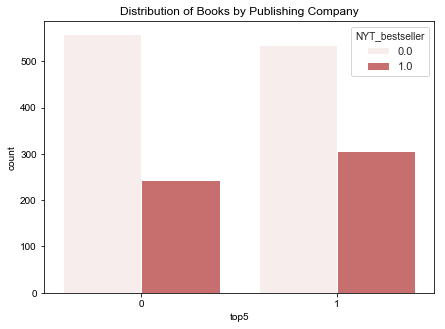

In [84]:
fig, ax = plt.subplots(figsize=(7,5))
sns.set(style="white", palette="muted", color_codes=True)
sns.countplot(x='top5',hue='NYT_bestseller',data=full_df,color='r')
plt.title('Distribution of Books by Publishing Company')
fig.savefig('top5')

# ax.legend('Top 5 Publishing Companies','Everyone else')

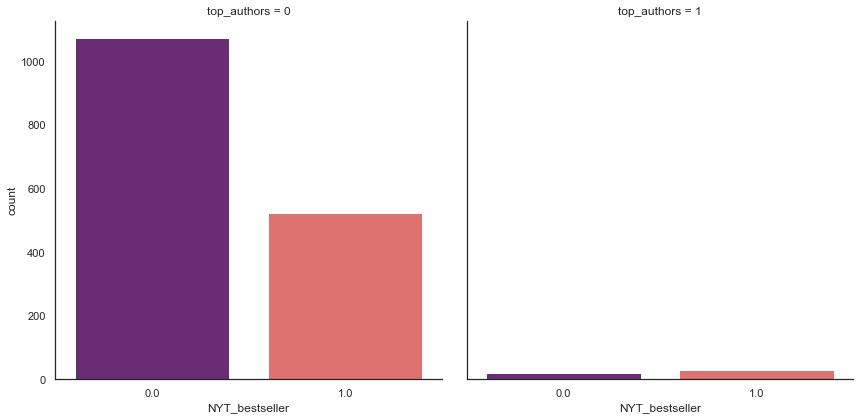

In [85]:
# fig, ax = plt.subplots(figsize=(7,5))
fig = sns.catplot(x="NYT_bestseller", col="top_authors",data=full_df, kind="count",height=6, aspect=1,palette="magma");
fig.savefig('top_authors')

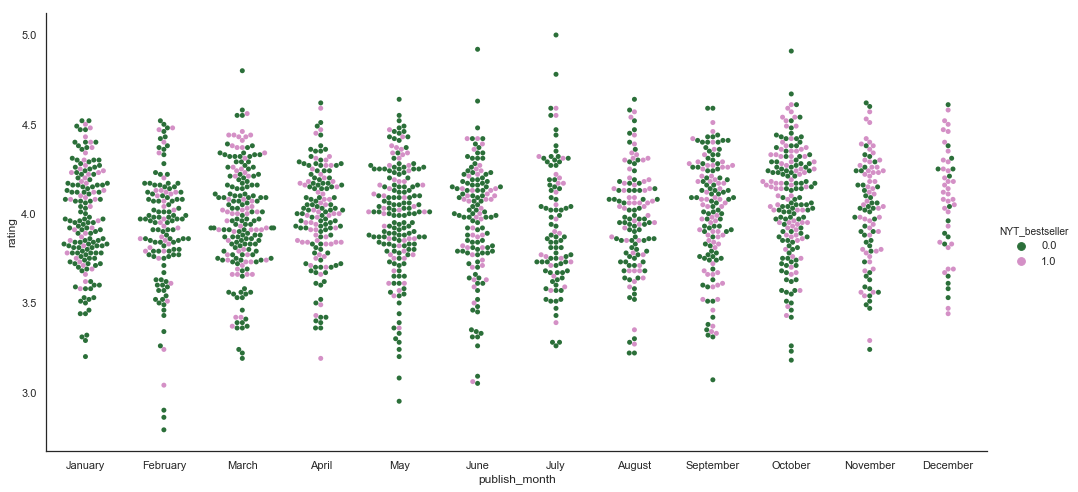

In [86]:
# fig, ax = plt.subplots(figsize=(5,8))
fig = sns.catplot(x="publish_month", y="rating", hue="NYT_bestseller", kind="swarm", 
                  data=full_df,height=7, aspect=2, palette='cubehelix',order=['January','February',
                 'March','April','May','June','July','August','September','October','November','December'])
plt.show(fig)
fig.savefig('month')

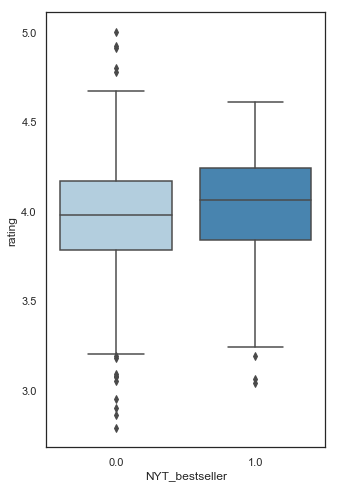

In [87]:
fig, ax = plt.subplots(figsize=(5,8))
sns.boxplot(x='NYT_bestseller',y='rating',data=full_df, palette="Blues")

fig.savefig('rating')

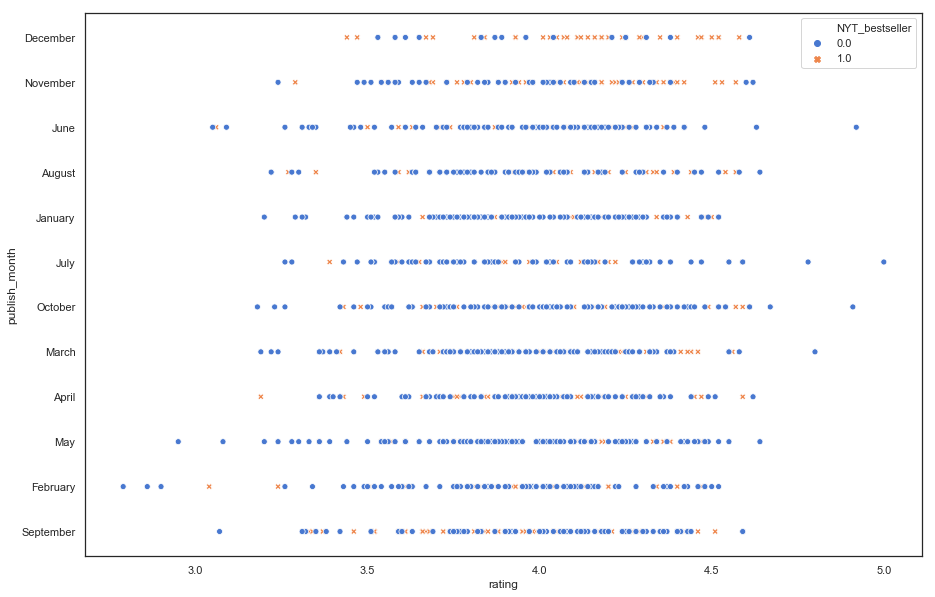

In [88]:
fig = plt.subplots(figsize=(15,10)) 
fig = sns.scatterplot(x='rating',y='publish_month', hue='NYT_bestseller', style='NYT_bestseller',data=full_df)
plt.show(fig)

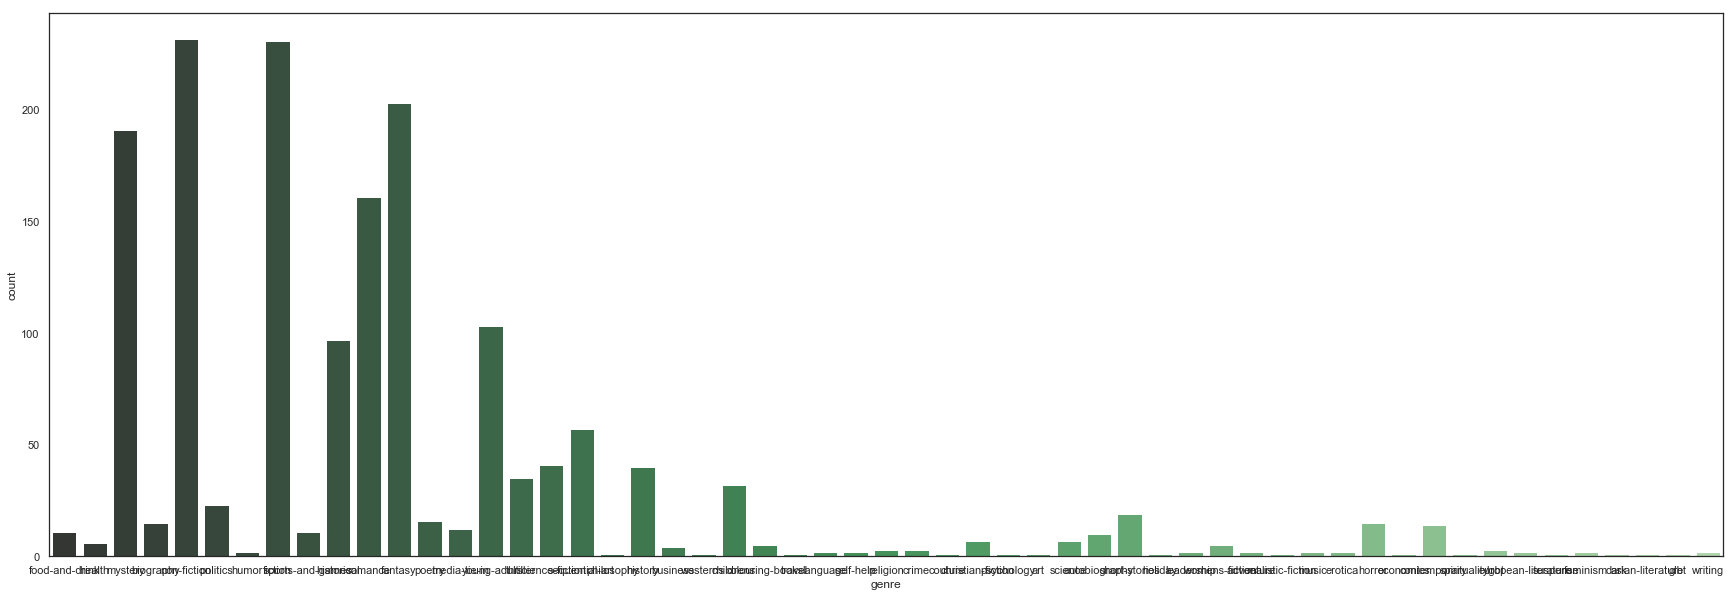

In [89]:
fig = plt.subplots(figsize=(30,10)) 
counts = sns.countplot(x="genre", data=full_df,palette="Greens_d")
plt.show(counts)

In [90]:
ratings_0 = full_df[full_df['NYT_bestseller']==0]
ratings_1 = full_df[full_df['NYT_bestseller']==1]

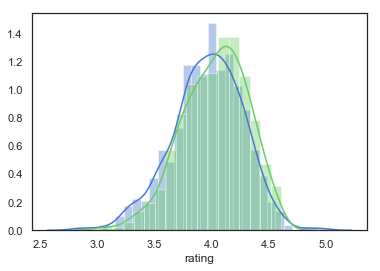

In [91]:
# plot of goodreads ratings broken out by bestseller or not!

sns.distplot(ratings_0.rating, kde=True,color='b')
sns.distplot(ratings_1.rating, kde=True,color='g')

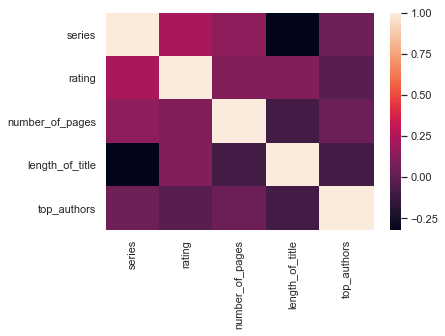

In [92]:
corr = full_df[['series','rating','number_of_pages','length_of_title','top_authors']].corr()
 
# Heatmap
sns.heatmap(corr)

In [93]:
pd.crosstab(full_df.genre, full_df.NYT_bestseller)

NYT_bestseller,0.0,1.0
genre,,
adventure,0,2
art,0,1
asian-literature,1,0
autobiography,5,5
biography,3,12
business,0,4
childrens,12,20
christian-fiction,6,1
colouring-books,0,5
